# Lab 4: Find Wally

In this exercise we are going to play the "Find wally" game. 

- **Inputs**: 
    You have 2 images, one with the Wally's profile, and another with the puzzle, were we should find Wally.

- **Expected result**:
    Visual location of Wally in the provided puzzle. 

## Requirements
You'll need the following libraries: 
- `ipykernel`
- `matplotlib`
- `opencv-python`
- `opencv-contrib-python`
- `nb_black`
- `ipympl`
- `scipy`
- `scikit-image`

## Guides
In the other notebook, we introduced Local Features. 
This exercise is a great example of the one application of the local features, especially due to its mental complexity. 

An option to implement this mini project is to: 
1. Find keypoints in both provided images
2. Build their descriptors
3. Match the descriptors between the 2 images
4. Run outlier removal algorithms to remove the incorrect matches.


In [47]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Read the input images

Steps: 
1. Read the two images
2. Convert them to RGB
3. Have a version of them in GrayScale

In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_wallys_face = cv2.imread("images/wally.png")
img_find_wally = cv2.imread("images/find_wally.jpg")

img_wallys_face_rgb = cv2.cvtColor(img_wallys_face, cv2.COLOR_BGR2RGB)
img_find_wally_rgb = cv2.cvtColor(img_find_wally, cv2.COLOR_BGR2RGB)

img_wallys_face_gray = cv2.cvtColor(img_wallys_face, cv2.COLOR_BGR2GRAY)
img_find_wally_gray = cv2.cvtColor(img_find_wally, cv2.COLOR_BGR2GRAY)

Display the images:

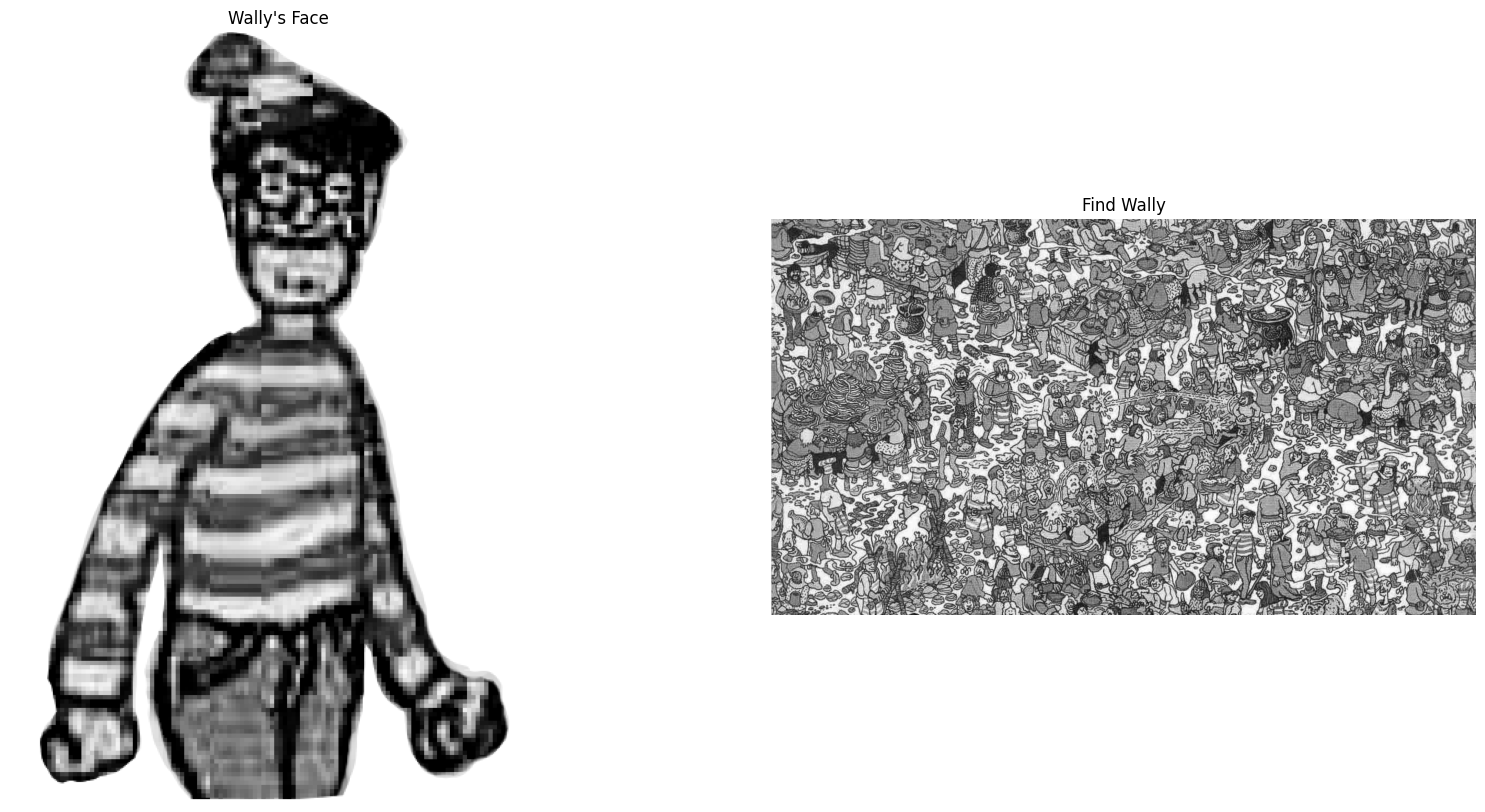

In [49]:
fx, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Wally's Face")
ax[0].imshow(img_wallys_face_gray, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find Wally")
ax[1].imshow(img_find_wally_gray, cmap="gray")
ax[1].axis("off")
plt.show()

### 2. Detect keypoints and create descriptor

During the class we mentioned SIFT, however you can use any algorithm for detection and description.

Steps: 
1. Find keypoints from the 2 grayscale images
2. Store their descriptors 

In [50]:
# --- YOUR CODE HERE, TO PREPARE DETECT THE KEYPOINTS, AND RESPECTIVE DESCRIPTORS ---

# Initiate ORB detector
# orb = cv2.ORB_create()

# find the keypoints with ORB
# pattern_keypoints, des1 = orb.detectAndCompute(img_wallys_face_gray, None)
# to_find_keypoints, des2 = orb.detectAndCompute(img_find_wally_gray, None)


# Initialize sift detector
sift = cv2.SIFT_create()

# find the keypoints with SIFT
pattern_keypoints, des1 = sift.detectAndCompute(img_wallys_face_gray, None)
to_find_keypoints, des2 = sift.detectAndCompute(img_find_wally_gray, None)

Draw keypoints in pattern's image - Wally's image.

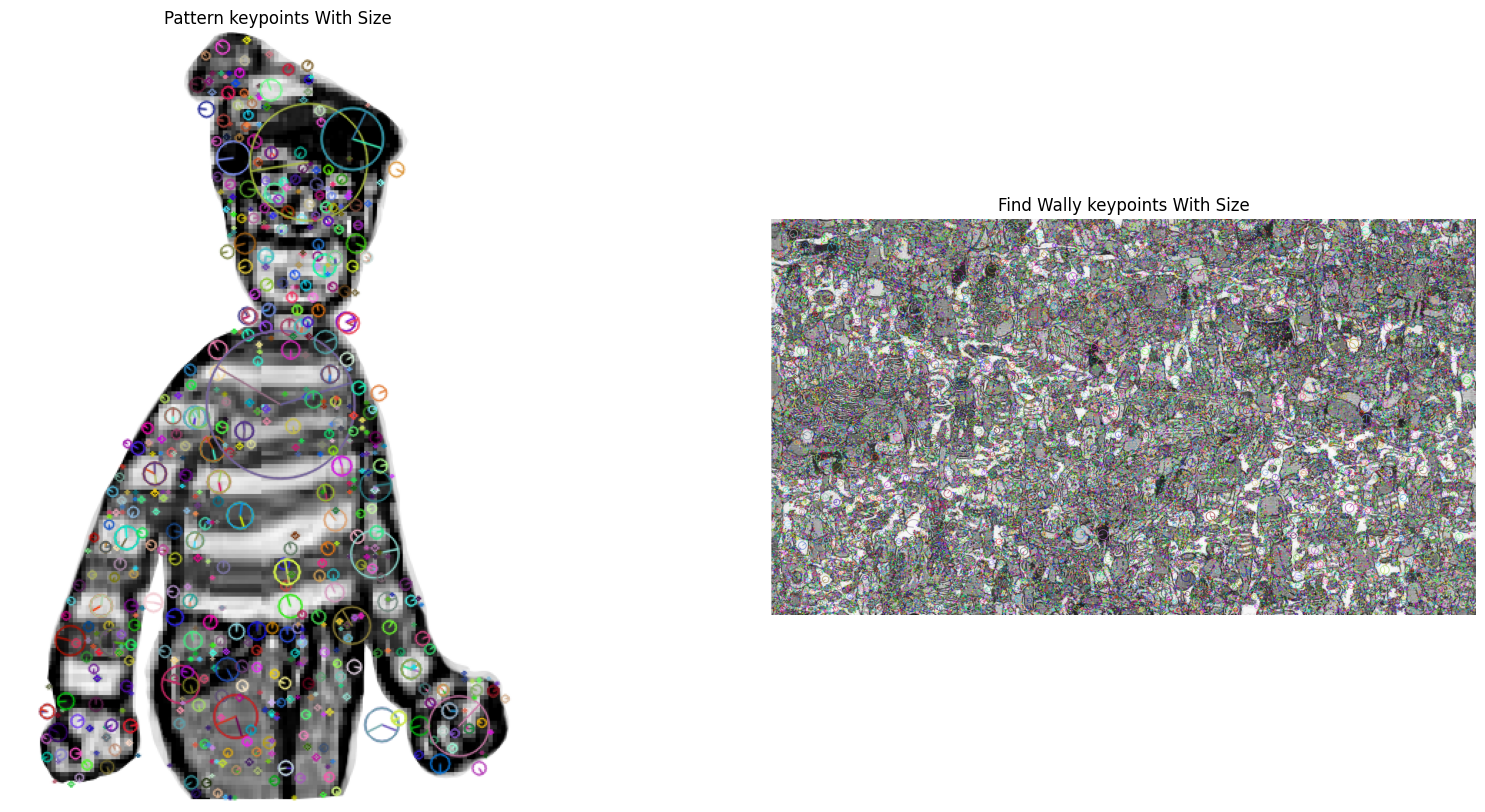

Number of Keypoints Detected In Wally's Image:  706
Number of Keypoints Detected In Find Wally's Image:  78182


In [51]:
# Wally's face
keypoints_with_size = np.copy(img_wallys_face_rgb)

keypoints_with_size = cv2.drawKeypoints(
    img_wallys_face_gray,
    pattern_keypoints,
    # keypoints_with_size,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Find Wally board
keypoints_with_size_find_wally = np.copy(img_find_wally_rgb)

keypoints_with_size_find_wally = cv2.drawKeypoints(
    img_find_wally_gray,
    to_find_keypoints,
    # keypoints_with_size_find_wally,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Print
fx, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Pattern keypoints With Size")
ax[0].imshow(keypoints_with_size, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find Wally keypoints With Size")
ax[1].imshow(keypoints_with_size_find_wally, cmap="gray")
ax[1].axis("off")
plt.show()

# Print the number of keypoints detected in the wally image
print("Number of Keypoints Detected In Wally's Image: ", len(pattern_keypoints))
print("Number of Keypoints Detected In Find Wally's Image: ", len(to_find_keypoints))

### 3. Match the descriptors between the 2 images - find correspondence

In [52]:
# --- YOUR CODE HERE, TO PREPARE MATCH THE DESCRIPTORS BETWEEN THE 2 IMAGES ---

# Bf for orb
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Bf for sift
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1, des2)
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

Print the matches

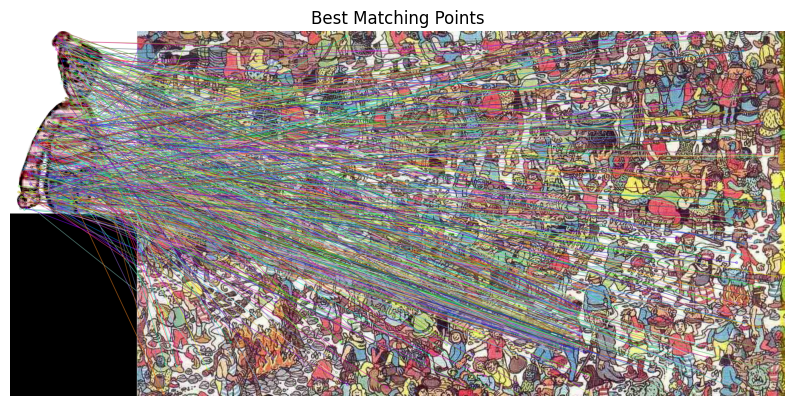


Number of Matching Keypoints Between The Training and Query Images:  706


In [53]:
result = cv2.drawMatches(
    img_wallys_face_rgb,
    pattern_keypoints,
    img_find_wally_rgb,
    to_find_keypoints,
    matches,
    img_find_wally_gray,
    flags=2,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [10.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.axis("off")
plt.show()

# Print total number of matching points between Wally and the puzzle board
print(
    "\nNumber of Matching Keypoints Between The Training and Query Images: ",
    len(matches),
)

We can see that a lot of matches are incorrect. So we need a way to remove the outliers.

### 4. Remove the incorrect matches / outliers


Number of Good Matches:  22


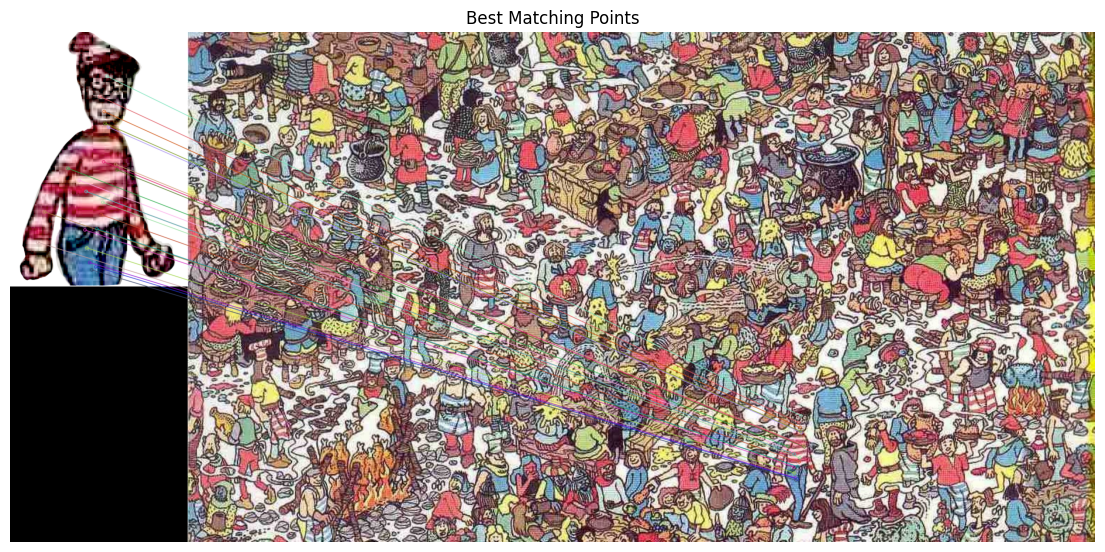

In [54]:
# --- YOUR CODE HERE, REMOVE THE INCORRECT MATCHES / OUTLIERS ---

# Define the minimum distance to identify an outlier
min_distance = 70

# Create lists of the keypoints for the query image and the training image
list_of_kp1 = [pattern_keypoints[mat.queryIdx] for mat in matches]
list_of_kp2 = [to_find_keypoints[mat.trainIdx] for mat in matches]

# Create a list of the distances
list_of_distances = [mat.distance for mat in matches]

# Create a list of the good matches
good_matches = [
    matches[i] for i in range(len(matches)) if list_of_distances[i] < min_distance
]

# Print the number of good matches
print("\nNumber of Good Matches: ", len(good_matches))

# --- YOUR CODE HERE, TO VISUALIZE THE GOOD MATCHES ---
result = cv2.drawMatches(
    img_wallys_face_rgb,
    pattern_keypoints,
    img_find_wally_rgb,
    to_find_keypoints,
    good_matches,
    img_find_wally_gray,
    flags=2,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.axis("off")
plt.show()